In [1]:
import requests
import csv
import calendar,time,datetime
import warnings
warnings.filterwarnings("ignore")
current_time_exact= datetime.datetime.now()
current_time=current_time_exact.strftime("%Y-%m-%d %H:%M:%S")
current_epoch_time=calendar.timegm(time.strptime(current_time, '%Y-%m-%d %H:%M:%S'))

#The part of keeping it realtime(for the scope of the project (time being) this has been already downloaded)
# currency="BTC"
# URL="https://query1.finance.yahoo.com/v7/finance/download/"+currency+"-USD?period1="+str(current_epoch_time)+"&period2="+str(current_epoch_time+31536000)+"&interval=1d&events=history&includeAdjustedClose=true"
# print(URL)
# req = requests.get(URL)
# url_content = req.content
# csv_file = open('data.csv', 'wb')
# csv_file.write(url_content)
# csv_file.close()


In [2]:
import pandas as pd
# data = pd.read_csv(currency+"-USD.csv")
df = pd.read_csv("BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-28,6467.253906,6467.500977,6117.837891,6242.193848,6242.193848,3.488523e+10
1,2020-03-29,6245.624512,6250.467285,5920.085938,5922.042969,5922.042969,2.837369e+10
2,2020-03-30,5925.538574,6517.195801,5903.234375,6429.841797,6429.841797,3.710165e+10
3,2020-03-31,6430.606445,6504.515137,6374.162109,6438.644531,6438.644531,3.278647e+10
4,2020-04-01,6437.319336,6612.573730,6202.373535,6606.776367,6606.776367,4.034643e+10


Text(0, 0.5, 'Close Price (USD)')

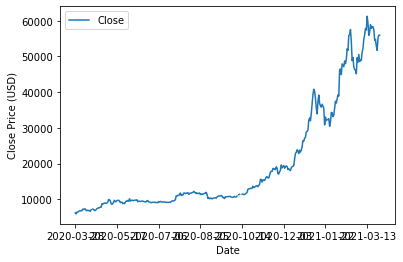

In [3]:
ax = df.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Keeping only Adjusted Close(Adj .Close) as only this will be helpful in predicting stock prices
df=df[['Adj Close']]
#Replacing NaN with 0
df['Adj Close'] = df['Adj Close'].fillna(0) 
#Declaring a forecast variable('n' days) to which forecast is to be made 'n' days into the future
forecast=30 #This means at a particular day I will be able to know the stock price after 30 days.
#Creating a Prediction Column which is a copy of Adj .Close but with 'forcast' number of rows shifted up
df['Prediction']=df[['Adj Close']].shift(-forecast)
#Take a look at the new Data
print(df.tail())

        Adj Close  Prediction
361  52774.265625         NaN
362  51704.160156         NaN
363  55137.312500         NaN
364  55973.511719         NaN
365  55925.078125         NaN


In [5]:
#Creating X and y independent and dependent variables respectively 
X= np.array(df.drop(['Prediction'],1))#Dropping the prediction Column
X=X[:-forecast] #Deleting the last 'n' rows
y=np.array(df.drop(['Adj Close'],1))#Dropping the Adj Close Column
y=y[:-forecast] #Deleting the last 'n' rows

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #Split the data into train and test


In [7]:
lr=LinearRegression()
lr.fit(X_train,y_train)
accuracy=lr.score(X_test,y_test)
print("Accuracy:",accuracy)

Accuracy: 0.8939606420692786


In [8]:
#Now when we have made the model now is the forecast time,so we use the last 'n' rows of the df
#creating X_forecast which will store the 'n' rows Adj .Close values
x_forecast=np.array(df.drop(['Prediction'],1))
x_forecast=x_forecast[-forecast:]



In [9]:
#using X_forecast to make prediction for the 'n' days using the model created
x_prediction=lr.predict(x_forecast)
print(x_prediction)

[[57738.09096149]
 [56433.52304604]
 [62012.78619503]
 [60457.94106525]
 [63138.95120423]
 [60684.14215678]
 [61138.75115515]
 [61120.22359893]
 [63968.92267032]
 [65260.01688188]
 [68460.4533639 ]
 [69931.09026375]
 [72161.77893307]
 [71574.44570042]
 [76430.48423647]
 [74020.75244169]
 [69805.2483864 ]
 [70919.87004906]
 [73485.08296007]
 [72228.57998823]
 [72834.16431911]
 [72793.1805881 ]
 [71812.01068218]
 [68094.20431761]
 [68354.70078904]
 [65915.2812533 ]
 [64586.59841389]
 [68849.3283379 ]
 [69887.58445826]
 [69827.44750254]]


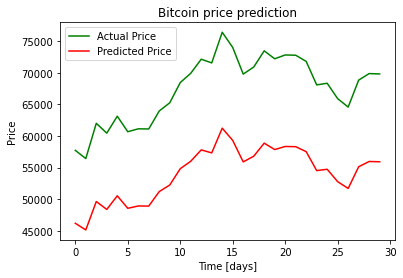

In [10]:
import matplotlib.pyplot as plt
plt.plot(x_prediction, label="Actual Price", color='green')
plt.plot(x_forecast, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();